In [75]:
import os
import pandas as pd
import numpy as np
import time 
import os
from sklearn.datasets import load_iris
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
from datetime import date

sns.set(rc={'figure.figsize':(7,4)})
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

os.chdir('/content/drive/MyDrive/Colab Notebooks/Churn Prediction')
df = pd.read_excel('Online Retail.xlsx')
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom

In [76]:
df = df.loc[:, ["CustomerID", "InvoiceNo", "StockCode", "Description", "Quantity", "InvoiceDate", "UnitPrice", "Country"]] # reorder columns
df = df[df.CustomerID.isna() == False]
df.head()

CustomerID InvoiceNo StockCode                          Description  \
0     17850.0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER   
1     17850.0    536365     71053                  WHITE METAL LANTERN   
2     17850.0    536365    84406B       CREAM CUPID HEARTS COAT HANGER   
3     17850.0    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE   
4     17850.0    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.   

   Quantity         InvoiceDate  UnitPrice         Country  
0         6 2010-12-01 08:26:00       2.55  United Kingdom  
1         6 2010-12-01 08:26:00       3.39  United Kingdom  
2         8 2010-12-01 08:26:00       2.75  United Kingdom  
3         6 2010-12-01 08:26:00       3.39  United Kingdom  
4         6 2010-12-01 08:26:00       3.39  United Kingdom

First, we compute the product of quantity and unit price to get the TotalPurchaseAmount. Second, we convert the datetime to date.

In [77]:
# TotalPurchaseAmount

df['TotalPurchaseAmount'] = (df.UnitPrice * df.Quantity).astype(float)
df = df.sort_values(["CustomerID", "InvoiceDate"])

df.InvoiceDate = pd.to_datetime(df.InvoiceDate)
df['InvoiceDate_date'] = df['InvoiceDate'].dt.date
df.head(10)

CustomerID InvoiceNo StockCode                          Description  \
61619     12346.0    541431     23166       MEDIUM CERAMIC TOP STORAGE JAR   
61624     12346.0   C541433     23166       MEDIUM CERAMIC TOP STORAGE JAR   
14938     12347.0    537626     85116      BLACK CANDELABRA T-LIGHT HOLDER   
14939     12347.0    537626     22375    AIRLINE BAG VINTAGE JET SET BROWN   
14940     12347.0    537626     71477    COLOUR GLASS. STAR T-LIGHT HOLDER   
14941     12347.0    537626     22492              MINI PAINT SET VINTAGE    
14942     12347.0    537626     22771  CLEAR DRAWER KNOB ACRYLIC EDWARDIAN   
14943     12347.0    537626     22772   PINK DRAWER KNOB ACRYLIC EDWARDIAN   
14944     12347.0    537626     22773  GREEN DRAWER KNOB ACRYLIC EDWARDIAN   
14945     12347.0    537626     22774    RED DRAWER KNOB ACRYLIC EDWARDIAN   

       Quantity         InvoiceDate  UnitPrice         Country  \
61619     74215 2011-01-18 10:01:00       1.04  United Kingdom   
61624    -74215 2011-01-18 10:17:00       1.04  United Kingdom   
14938        12 2010-12-07 14:57:00       2.10         Iceland   
14939         4 2010-12-07 14:57:00       4.25         Iceland   
14940        12 2010-12-07 14:57:00       3.25         Iceland   
14941        36 2010-12-07 14:57:00       0.65         Iceland   
14942        12 2010-12-07 14:57:00       1.25         Iceland   
14943        12 2010-12-07 14:57:00       1.25         Iceland   
14944        12 2010-12-07 14:57:00       1.25         Iceland   
14945        12 2010-12-07 14:57:00       1.25         Iceland   

       TotalPurchaseAmount InvoiceDate_date  
61619              77183.6       2011-01-18  
61624             -77183.6       2011-01-18  
14938                 25.2       2010-12-07  
14939                 17.0       2010-12-07  
14940                 39.0       2010-12-07  
14941                 23.4       2010-12-07  
14942                 15.0       2010-12-07  
14943                 15.0       2010-12-07  
14944                 15.0       2010-12-07  
14945                 15.0       2010-12-07

Since the dataset contains both orders and returns (negative quantity and C in their InvoiceNumber), we have to exclude the returns and only focus on the orders. One option is to keep the orders that are returned alternatively we can cancel them out. For simplicity, we will delete returns.

In [78]:
# flag and exlude rows that are returns

df['ReturnFlag'] = np.where(df['InvoiceNo'].str.contains("C", case=False, na=False), 1, 0)
df.head(10)

CustomerID InvoiceNo StockCode                          Description  \
61619     12346.0    541431     23166       MEDIUM CERAMIC TOP STORAGE JAR   
61624     12346.0   C541433     23166       MEDIUM CERAMIC TOP STORAGE JAR   
14938     12347.0    537626     85116      BLACK CANDELABRA T-LIGHT HOLDER   
14939     12347.0    537626     22375    AIRLINE BAG VINTAGE JET SET BROWN   
14940     12347.0    537626     71477    COLOUR GLASS. STAR T-LIGHT HOLDER   
14941     12347.0    537626     22492              MINI PAINT SET VINTAGE    
14942     12347.0    537626     22771  CLEAR DRAWER KNOB ACRYLIC EDWARDIAN   
14943     12347.0    537626     22772   PINK DRAWER KNOB ACRYLIC EDWARDIAN   
14944     12347.0    537626     22773  GREEN DRAWER KNOB ACRYLIC EDWARDIAN   
14945     12347.0    537626     22774    RED DRAWER KNOB ACRYLIC EDWARDIAN   

       Quantity         InvoiceDate  UnitPrice         Country  \
61619     74215 2011-01-18 10:01:00       1.04  United Kingdom   
61624    -74215 2011-01-18 10:17:00       1.04  United Kingdom   
14938        12 2010-12-07 14:57:00       2.10         Iceland   
14939         4 2010-12-07 14:57:00       4.25         Iceland   
14940        12 2010-12-07 14:57:00       3.25         Iceland   
14941        36 2010-12-07 14:57:00       0.65         Iceland   
14942        12 2010-12-07 14:57:00       1.25         Iceland   
14943        12 2010-12-07 14:57:00       1.25         Iceland   
14944        12 2010-12-07 14:57:00       1.25         Iceland   
14945        12 2010-12-07 14:57:00       1.25         Iceland   

       TotalPurchaseAmount InvoiceDate_date  ReturnFlag  
61619              77183.6       2011-01-18           0  
61624             -77183.6       2011-01-18           1  
14938                 25.2       2010-12-07           0  
14939                 17.0       2010-12-07           0  
14940                 39.0       2010-12-07           0  
14941                 23.4       2010-12-07           0  
14942                 15.0       2010-12-07           0  
14943                 15.0       2010-12-07           0  
14944                 15.0       2010-12-07           0  
14945                 15.0       2010-12-07           0

In [79]:
df['ReturnFlag'].value_counts()

0    397924
1      8905
Name: ReturnFlag, dtype: int64

Next, we get the maximum date per invoice number, which we will use to aggregate spendings on a daily basis. It can appear that orders can have different timestamps and one customer can have different invoice numbers per day due to multiple orders per day. 

In [80]:
# keep only purchases and get the latest order date per customer 

df_purchase_only = df[df.ReturnFlag == 0]
df_purchase_only = df_purchase_only.sort_values(["CustomerID", "InvoiceDate"])
df_purchase_only['MaxDate'] = pd.to_datetime(df_purchase_only.groupby(['CustomerID', 'InvoiceNo'])['InvoiceDate_date'].transform(max))
df_purchase_only.head()

CustomerID InvoiceNo StockCode                        Description  \
61619     12346.0    541431     23166     MEDIUM CERAMIC TOP STORAGE JAR   
14938     12347.0    537626     85116    BLACK CANDELABRA T-LIGHT HOLDER   
14939     12347.0    537626     22375  AIRLINE BAG VINTAGE JET SET BROWN   
14940     12347.0    537626     71477  COLOUR GLASS. STAR T-LIGHT HOLDER   
14941     12347.0    537626     22492            MINI PAINT SET VINTAGE    

       Quantity         InvoiceDate  UnitPrice         Country  \
61619     74215 2011-01-18 10:01:00       1.04  United Kingdom   
14938        12 2010-12-07 14:57:00       2.10         Iceland   
14939         4 2010-12-07 14:57:00       4.25         Iceland   
14940        12 2010-12-07 14:57:00       3.25         Iceland   
14941        36 2010-12-07 14:57:00       0.65         Iceland   

       TotalPurchaseAmount InvoiceDate_date  ReturnFlag    MaxDate  
61619              77183.6       2011-01-18           0 2011-01-18  
14938                 25.2       2010-12-07           0 2010-12-07  
14939                 17.0       2010-12-07           0 2010-12-07  
14940                 39.0       2010-12-07           0 2010-12-07  
14941                 23.4       2010-12-07           0 2010-12-07

In [81]:
df_purchase_only.loc[(df_purchase_only['MaxDate']== '2010-12-07') & (df_purchase_only['CustomerID']== 12347.0)].TotalPurchaseAmount.sum()

711.79

Next, we have to aggregate the orders to get the total purchase amount per customer per day.

In [82]:
# aggregation per day
agg_df = df_purchase_only.groupby(['CustomerID', 'MaxDate']).agg(
    TotalPurchaseAmount=('TotalPurchaseAmount', np.sum),
    Quantity=('Quantity', np.sum),
    InvoiceDate=('InvoiceDate', np.max))

agg_df.head(20)

TotalPurchaseAmount  Quantity         InvoiceDate
CustomerID MaxDate                                                      
12346.0    2011-01-18             77183.60     74215 2011-01-18 10:01:00
12347.0    2010-12-07               711.79       319 2010-12-07 14:57:00
           2011-01-26               475.39       315 2011-01-26 14:30:00
           2011-04-07               636.25       483 2011-04-07 10:43:00
           2011-06-09               382.52       196 2011-06-09 13:01:00
           2011-08-02               584.91       277 2011-08-02 08:48:00
           2011-10-31              1294.32       676 2011-10-31 12:25:00
           2011-12-07               224.82       192 2011-12-07 15:52:00
12348.0    2010-12-16               892.80      1254 2010-12-16 19:09:00
           2011-01-25               227.44       601 2011-01-25 10:42:00
           2011-04-05               367.00       269 2011-04-05 10:47:00
           2011-09-25               310.00       217 2011-09-25 13:13:00
12349.0    2011-11-21              1757.55       631 2011-11-21 09:51:00
12350.0    2011-02-02               334.40       197 2011-02-02 16:01:00
12352.0    2011-02-16               296.50        98 2011-02-16 12:33:00
           2011-03-01               984.65        29 2011-03-01 15:52:00
           2011-03-17               120.33        63 2011-03-17 16:00:00
           2011-03-22               160.33        64 2011-03-22 16:08:00
           2011-09-20               366.25       103 2011-09-20 14:34:00
           2011-09-28               266.25        52 2011-09-28 14:58:00

In [83]:
agg_df = agg_df.reset_index()
agg_df.head()

CustomerID    MaxDate  TotalPurchaseAmount  Quantity         InvoiceDate
0     12346.0 2011-01-18             77183.60     74215 2011-01-18 10:01:00
1     12347.0 2010-12-07               711.79       319 2010-12-07 14:57:00
2     12347.0 2011-01-26               475.39       315 2011-01-26 14:30:00
3     12347.0 2011-04-07               636.25       483 2011-04-07 10:43:00
4     12347.0 2011-06-09               382.52       196 2011-06-09 13:01:00

The overall goal is to transfer transactional data into customer wise features which we will feed into an ml algorithm. In this case we will take the transaction and aggregate them into the features:


* spendings per month from the first until the last order  
* sum of spendings last month, last 3 months and last 6 months
* customer age = timedelta between first order and today




The major problem is that we have different timestamps per customer, meaning different date ranges per customer and different missing values. Ideally we have per customer all months and the total spending each. when we pivot the table, every date occuring in the dataframe is entailed in the index, however, if there is any date, where no customer bought a product afterwards we will resample the index meaning filling index with nan.


In [84]:
df_pivot = agg_df.pivot_table('TotalPurchaseAmount', 'MaxDate', 'CustomerID')
df_pivot.head(20)

CustomerID  12346.0  12347.0  12348.0  12349.0  12350.0  12352.0  12353.0  \
MaxDate                                                                     
2010-12-01      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2010-12-02      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2010-12-03      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2010-12-05      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2010-12-06      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2010-12-07      NaN   711.79      NaN      NaN      NaN      NaN      NaN   
2010-12-08      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2010-12-09      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2010-12-10      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2010-12-12      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2010-12-13      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2010-12-14      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2010-12-15      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2010-12-16      NaN      NaN    892.8      NaN      NaN      NaN      NaN   
2010-12-17      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2010-12-19      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2010-12-20      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2010-12-21      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2010-12-22      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2010-12-23      NaN      NaN      NaN      NaN      NaN      NaN      NaN   

CustomerID  12354.0  12355.0  12356.0  12357.0  12358.0  12359.0  12360.0  \
MaxDate                                                                     
2010-12-01      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2010-12-02      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2010-12-03      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2010-12-05      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2010-12-06      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2010-12-07      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2010-12-08      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2010-12-09      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2010-12-10      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2010-12-12      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2010-12-13      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2010-12-14      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2010-12-15      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2010-12-16      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2010-12-17      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2010-12-19      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2010-12-20      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2010-12-21      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2010-12-22      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2010-12-23      NaN      NaN      NaN      NaN      NaN      NaN      NaN   

CustomerID  12361.0  12362.0  12363.0  12364.0  12365.0  12367.0  12370.0  \
MaxDate                                                                     
2010-12-01      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2010-12-02      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2010-12-03      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2010-12-05      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2010-12-06      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2010-12-07      NaN      NaN      NaN      NaN      NaN      NaN      N

In [85]:
df_pivot.index = pd.to_datetime(df_pivot.index)
df_pivot.index.min(), df_pivot.index.max()

(Timestamp('2010-12-01 00:00:00'), Timestamp('2011-12-09 00:00:00'))

In [86]:
df_pivot.shape

(305, 4339)

Now we know that the first order was on the 2010-12-01 and the last order on the 2011-12-09. Next, we are setting the desired date range, and fill all the missing dates in the DateIndex for the desired date range. 

In [87]:
start = pd.to_datetime('2010-10-01')
end = pd.to_datetime('2011-12-31')

df_pivot = df_pivot.reindex(pd.date_range(start, end), fill_value="NaN")

In [88]:
df_pivot.shape

(457, 4339)

In [89]:
df_pivot.head()

CustomerID 12346.0 12347.0 12348.0 12349.0 12350.0 12352.0 12353.0 12354.0  \
2010-10-01     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2010-10-02     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2010-10-03     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2010-10-04     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2010-10-05     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2010-10-06     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2010-10-07     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2010-10-08     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2010-10-09     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2010-10-10     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

CustomerID 12355.0 12356.0 12357.0 12358.0 12359.0 12360.0 12361.0 12362.0  \
2010-10-01     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2010-10-02     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2010-10-03     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2010-10-04     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2010-10-05     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2010-10-06     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2010-10-07     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2010-10-08     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2010-10-09     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2010-10-10     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

CustomerID 12363.0 12364.0 12365.0 12367.0 12370.0 12371.0 12372.0 12373.0  \
2010-10-01     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2010-10-02     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2010-10-03     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2010-10-04     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2010-10-05     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2010-10-06     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2010-10-07     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2010-10-08     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2010-10-09     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2010-10-10     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

CustomerID 12374.0 12375.0 12377.0 12378.0 12379.0 12380.0 12381.0 12383.0  \
2010-10-01     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2010-10-02     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2010-10-03     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2010-10-04     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2010-10-05     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2010-10-06     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2010-10-07     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2010-10-08     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2010-10-09     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2010-10-10     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

CustomerID 12384.0 12386.0 12388.0 12390.0 12391.0 12393.0 12394.0 12395.0  \
2010-10-01     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2010-10-02     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2010-10-03     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2010-10-04     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2010-10-05     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2010-10-06     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2010-10-07     NaN

Now, we can aggregate the monthly spending across the desired date range. For this, we firstly bring the pivot table into the format CustomerId, Date. Then we will aggregate the individual dates to months.

In [ ]:
# dates = df_pivot.resample('D').asfreq().index

In [90]:
df_pivot_unstack = df_pivot.unstack(level=0)
df_pivot_unstack = pd.DataFrame(df_pivot_unstack)
df_pivot_unstack =  df_pivot_unstack.reset_index().rename(columns={0: "TotalRev", "level_1": "Date",})

df_pivot_unstack.head(10)

CustomerID       Date TotalRev
0     12346.0 2010-10-01      NaN
1     12346.0 2010-10-02      NaN
2     12346.0 2010-10-03      NaN
3     12346.0 2010-10-04      NaN
4     12346.0 2010-10-05      NaN
5     12346.0 2010-10-06      NaN
6     12346.0 2010-10-07      NaN
7     12346.0 2010-10-08      NaN
8     12346.0 2010-10-09      NaN
9     12346.0 2010-10-10      NaN

In [ ]:
# we will learn pivot, unstack, reset_index, fill missing dates, equalize the daterangeindex for every customer

In [91]:
df_pivot_unstack['Date'] = pd.to_datetime(df_pivot_unstack['Date'])
df_pivot_unstack['TotalRev'] = df_pivot_unstack['TotalRev'].fillna(0).astype(float)
df_pivot_unstack.head()

CustomerID       Date  TotalRev
0     12346.0 2010-10-01       NaN
1     12346.0 2010-10-02       NaN
2     12346.0 2010-10-03       NaN
3     12346.0 2010-10-04       NaN
4     12346.0 2010-10-05       NaN

Next, let's aggregate the spendings monthly wise per customer.

In [92]:
df_1 = df_pivot_unstack.groupby(by=['CustomerID', pd.Grouper(key='Date', freq='MS')])['TotalRev'].agg('sum') # MS = month start
df_1 = df_1.reset_index()
df_1["Date"] = df_1["Date"].dt.date
df_1.head(10)

CustomerID        Date  TotalRev
0     12346.0  2010-10-01       0.0
1     12346.0  2010-11-01       0.0
2     12346.0  2010-12-01       0.0
3     12346.0  2011-01-01   77183.6
4     12346.0  2011-02-01       0.0
5     12346.0  2011-03-01       0.0
6     12346.0  2011-04-01       0.0
7     12346.0  2011-05-01       0.0
8     12346.0  2011-06-01       0.0
9     12346.0  2011-07-01       0.0

In [93]:
df_final_pivot = df_1.pivot_table('TotalRev', 'CustomerID', 'Date', dropna=False, fill_value=0)
df_final_pivot = df_final_pivot.reset_index()
df_final_pivot = df_final_pivot.round(2)
df_final_pivot.head()

Date  CustomerID  2010-10-01  2010-11-01  2010-12-01  2011-01-01  2011-02-01  \
0        12346.0           0           0        0.00    77183.60         0.0   
1        12347.0           0           0      711.79      475.39         0.0   
2        12348.0           0           0      892.80      227.44         0.0   
3        12349.0           0           0        0.00        0.00         0.0   
4        12350.0           0           0        0.00        0.00       334.4   

Date  2011-03-01  2011-04-01  2011-05-01  2011-06-01  2011-07-01  2011-08-01  \
0            0.0        0.00         0.0        0.00         0.0        0.00   
1            0.0      636.25         0.0      382.52         0.0      584.91   
2            0.0      367.00         0.0        0.00         0.0        0.00   
3            0.0        0.00         0.0        0.00         0.0        0.00   
4            0.0        0.00         0.0        0.00         0.0        0.00   

Date  2011-09-01  2011-10-01  2011-11-01  2011-12-01  
0            0.0        0.00        0.00        0.00  
1            0.0     1294.32        0.00      224.82  
2          310.0        0.00        0.00        0.00  
3            0.0        0.00     1757.55        0.00  
4            0.0        0.00        0.00        0.00

Finally, we can calculate the spendings for the last, last three, six and twelve months.

In [94]:
df_final_pivot['last_month']= df_final_pivot.iloc[:, -1:].sum(axis=1)
df_final_pivot['last_3_months']= df_final_pivot.iloc[:, -3:-1].sum(axis=1)
df_final_pivot['last_6_months']= df_final_pivot.iloc[:, -6:-2].sum(axis=1)
df_final_pivot['last_12_months']= df_final_pivot.iloc[:, -12:-3].sum(axis=1)
df_final_pivot.columns = df_final_pivot.columns.astype(str) #######
df_final_pivot.head()

Date  CustomerID  2010-10-01  2010-11-01  2010-12-01  2011-01-01  2011-02-01  \
0        12346.0           0           0        0.00    77183.60         0.0   
1        12347.0           0           0      711.79      475.39         0.0   
2        12348.0           0           0      892.80      227.44         0.0   
3        12349.0           0           0        0.00        0.00         0.0   
4        12350.0           0           0        0.00        0.00       334.4   

Date  2011-03-01  2011-04-01  2011-05-01  2011-06-01  2011-07-01  2011-08-01  \
0            0.0        0.00         0.0        0.00         0.0        0.00   
1            0.0      636.25         0.0      382.52         0.0      584.91   
2            0.0      367.00         0.0        0.00         0.0        0.00   
3            0.0        0.00         0.0        0.00         0.0        0.00   
4            0.0        0.00         0.0        0.00         0.0        0.00   

Date  2011-09-01  2011-10-01  2011-11-01  2011-12-01  last_month  \
0            0.0        0.00        0.00        0.00        0.00   
1            0.0     1294.32        0.00      224.82      224.82   
2          310.0        0.00        0.00        0.00        0.00   
3            0.0        0.00     1757.55        0.00        0.00   
4            0.0        0.00        0.00        0.00        0.00   

Date  last_3_months  last_6_months  last_12_months  
0              0.00           0.00            0.00  
1            224.82        1519.14         3122.82  
2              0.00         310.00          677.00  
3           1757.55        1757.55         1757.55  
4              0.00           0.00            0.00

Last but not least, let's calculate the spending frequency per customer and attach it to the existing dataframe. We begin with aggregating the individual transactions per invoice number. We will sum quantity and TotalPurchaseAmount while keeping the last transaction within an InvoiceNo.

In [95]:
agg_df = df_purchase_only.groupby(['CustomerID', 'InvoiceNo']).agg(
    TotalPurchaseAmount=('TotalPurchaseAmount', np.sum),
    Quantity=('Quantity', np.sum),
    InvoiceDate=('InvoiceDate', np.max))

agg_df.head(20)

TotalPurchaseAmount  Quantity         InvoiceDate
CustomerID InvoiceNo                                                   
12346.0    541431                77183.60     74215 2011-01-18 10:01:00
12347.0    537626                  711.79       319 2010-12-07 14:57:00
           542237                  475.39       315 2011-01-26 14:30:00
           549222                  636.25       483 2011-04-07 10:43:00
           556201                  382.52       196 2011-06-09 13:01:00
           562032                  584.91       277 2011-08-02 08:48:00
           573511                 1294.32       676 2011-10-31 12:25:00
           581180                  224.82       192 2011-12-07 15:52:00
12348.0    539318                  892.80      1254 2010-12-16 19:09:00
           541998                  227.44       601 2011-01-25 10:42:00
           548955                  367.00       269 2011-04-05 10:47:00
           568172                  310.00       217 2011-09-25 13:13:00
12349.0    577609                 1757.55       631 2011-11-21 09:51:00
12350.0    543037                  334.40       197 2011-02-02 16:01:00
12352.0    544156                  296.50        98 2011-02-16 12:33:00
           545323                  144.35        26 2011-03-01 14:57:00
           545332                  840.30         3 2011-03-01 15:52:00
           546869                  120.33        63 2011-03-17 16:00:00
           547390                  160.33        64 2011-03-22 16:08:00
           567505                  366.25       103 2011-09-20 14:34:00

In [96]:
# RunningCount based on two columns
agg_df['RunningCountTransaction'] = agg_df.groupby(['CustomerID']).cumcount()+1
agg_df['DateDifference'] = agg_df['InvoiceDate'].diff().dt.days

# setting date difference to nan, for the first transaction 
agg_df.loc[agg_df['RunningCountTransaction'] == 1, 'DateDifference'] = np.nan

# get the date of the last transaction and create a column, flagging the first and the last transaction 
agg_df['MaxDate'] = pd.to_datetime(agg_df.groupby(['CustomerID'])['InvoiceDate'].transform(max))
agg_df['MinMaxColumn'] = agg_df['RunningCountTransaction']
agg_df.loc[agg_df['InvoiceDate'] == agg_df['MaxDate'], 'MinMaxColumn'] = 'max'
agg_df.loc[agg_df['RunningCountTransaction'] == 1, 'MinMaxColumn'] = 'min'

agg_df.head(20)

TotalPurchaseAmount  Quantity         InvoiceDate  \
CustomerID InvoiceNo                                                      
12346.0    541431                77183.60     74215 2011-01-18 10:01:00   
12347.0    537626                  711.79       319 2010-12-07 14:57:00   
           542237                  475.39       315 2011-01-26 14:30:00   
           549222                  636.25       483 2011-04-07 10:43:00   
           556201                  382.52       196 2011-06-09 13:01:00   
           562032                  584.91       277 2011-08-02 08:48:00   
           573511                 1294.32       676 2011-10-31 12:25:00   
           581180                  224.82       192 2011-12-07 15:52:00   
12348.0    539318                  892.80      1254 2010-12-16 19:09:00   
           541998                  227.44       601 2011-01-25 10:42:00   
           548955                  367.00       269 2011-04-05 10:47:00   
           568172                  310.00       217 2011-09-25 13:13:00   
12349.0    577609                 1757.55       631 2011-11-21 09:51:00   
12350.0    543037                  334.40       197 2011-02-02 16:01:00   
12352.0    544156                  296.50        98 2011-02-16 12:33:00   
           545323                  144.35        26 2011-03-01 14:57:00   
           545332                  840.30         3 2011-03-01 15:52:00   
           546869                  120.33        63 2011-03-17 16:00:00   
           547390                  160.33        64 2011-03-22 16:08:00   
           567505                  366.25       103 2011-09-20 14:34:00   

                      RunningCountTransaction  DateDifference  \
CustomerID InvoiceNo                                            
12346.0    541431                           1             NaN   
12347.0    537626                           1             NaN   
           542237                           2            49.0   
           549222                           3            70.0   
           556201                           4            63.0   
           562032                           5            53.0   
           573511                           6            90.0   
           581180                           7            37.0   
12348.0    539318                           1             NaN   
           541998                           2            39.0   
           548955                           3            70.0   
           568172                           4           173.0   
12349.0    577609                           1             NaN   
12350.0    543037                           1             NaN   
12352.0    544156                           1             NaN   
           545323                           2            13.0   
           545332                           3             0.0   
           546869                           4            16.0   
           547390                           5             5.0   
           567505                           6           181.0   

                                 MaxDate MinMaxColumn  
CustomerID InvoiceNo                                   
12346.0    541431    2011-01-18 10:01:00          min  
12347.0    537626    2011-12-07 15:52:00          min  
           542237    2011-12-07 15:52:00            2  
           549222    2011-12-07 15:52:00            3  
           556201    2011-12-07 15:52:00            4  
           562032    2011-12-07 15:52:00            5  
           573511    2011-12-07 15:52:00            6  
           581180    2011-12-07 15:52:00          max  
12348.0    539318    2011-09-25 13:13:00          min  
           541998    2011-09-25 13:13:00            2  
           548955    2011-09-25 13:13:00            3  
           568172    2011-09-25 13:13:00          max  
12349.0    577609    2011-11-21 09:51:00          min  
12350.0    543037    2011-02-02 16:01:00          min  
12352.0    544156    2011-11-03 14:37:00    

With the datedifference between transaction we are able to calculate the 90th percentile with respect to datedifference. This tells us the max datedifference for 90% of the transaction per customer.

In [97]:
quantiles = agg_df.groupby('CustomerID')['DateDifference'].quantile(q=0.9)
quantiles_df = pd.DataFrame(quantiles).rename(columns={"DateDifference": "q90th"})
quantiles_df.head(10)

q90th
CustomerID       
12346.0       NaN
12347.0      80.0
12348.0     152.4
12349.0       NaN
12350.0       NaN
12352.0      93.4
12353.0       NaN
12354.0       NaN
12355.0       NaN
12356.0     207.8

Finally we can now aggregate the dataframe to one row per customer and concatenate it with the 90th percentiles.

In [99]:
agg_agg_df = agg_df.groupby(['CustomerID']).agg(
    TotalRev=('TotalPurchaseAmount', np.sum),
    TotalQuantity=('Quantity', np.sum),
    FirstInvoiceDate=('InvoiceDate', np.min),
    LastInvoiceDate=('InvoiceDate', np.max),
    DateDiff_mean=('DateDifference', np.mean),
    NoTotalTrans=('RunningCountTransaction', np.max))

agg_agg_df.head()

TotalRev  TotalQuantity    FirstInvoiceDate     LastInvoiceDate  \
CustomerID                                                                    
12346.0     77183.60          74215 2011-01-18 10:01:00 2011-01-18 10:01:00   
12347.0      4310.00           2458 2010-12-07 14:57:00 2011-12-07 15:52:00   
12348.0      1797.24           2341 2010-12-16 19:09:00 2011-09-25 13:13:00   
12349.0      1757.55            631 2011-11-21 09:51:00 2011-11-21 09:51:00   
12350.0       334.40            197 2011-02-02 16:01:00 2011-02-02 16:01:00   

            DateDiff_mean  NoTotalTrans  
CustomerID                               
12346.0               NaN             1  
12347.0         60.333333             7  
12348.0         94.000000             4  
12349.0               NaN             1  
12350.0               NaN             1

In [100]:
agg_agg_df = pd.merge(agg_agg_df, 
                      quantiles_df, 
                      on ='CustomerID', 
                      how ='left')

agg_agg_df.head()

TotalRev  TotalQuantity    FirstInvoiceDate     LastInvoiceDate  \
CustomerID                                                                    
12346.0     77183.60          74215 2011-01-18 10:01:00 2011-01-18 10:01:00   
12347.0      4310.00           2458 2010-12-07 14:57:00 2011-12-07 15:52:00   
12348.0      1797.24           2341 2010-12-16 19:09:00 2011-09-25 13:13:00   
12349.0      1757.55            631 2011-11-21 09:51:00 2011-11-21 09:51:00   
12350.0       334.40            197 2011-02-02 16:01:00 2011-02-02 16:01:00   

            DateDiff_mean  NoTotalTrans  q90th  
CustomerID                                      
12346.0               NaN             1    NaN  
12347.0         60.333333             7   80.0  
12348.0         94.000000             4  152.4  
12349.0               NaN             1    NaN  
12350.0               NaN             1    NaN

With the information at hand we can set a rule-based churn detection, by setting every customer whose last transaction is farther in the past than the 90th percentile is a churned customer. For this we first have to compute the datedifference between today or desired date and the last transaction. 

In [101]:
max_date = agg_agg_df.LastInvoiceDate.dt.date.max()
today = max_date + datetime.timedelta(days=30) # this could be today in a real case scenario 

print(max_date, today)

agg_agg_df.head()

2011-12-09 2012-01-08


TotalRev  TotalQuantity    FirstInvoiceDate     LastInvoiceDate  \
CustomerID                                                                    
12346.0     77183.60          74215 2011-01-18 10:01:00 2011-01-18 10:01:00   
12347.0      4310.00           2458 2010-12-07 14:57:00 2011-12-07 15:52:00   
12348.0      1797.24           2341 2010-12-16 19:09:00 2011-09-25 13:13:00   
12349.0      1757.55            631 2011-11-21 09:51:00 2011-11-21 09:51:00   
12350.0       334.40            197 2011-02-02 16:01:00 2011-02-02 16:01:00   

            DateDiff_mean  NoTotalTrans  q90th  
CustomerID                                      
12346.0               NaN             1    NaN  
12347.0         60.333333             7   80.0  
12348.0         94.000000             4  152.4  
12349.0               NaN             1    NaN  
12350.0               NaN             1    NaN

In [102]:
# derive some additional columns

agg_agg_df['diff_today_last_trans'] = (today - agg_agg_df.LastInvoiceDate.dt.date).dt.days.astype(int)
agg_agg_df['CustomerAge'] = (today - agg_agg_df.FirstInvoiceDate.dt.date).dt.days
agg_agg_df['churn'] = np.where((agg_agg_df['diff_today_last_trans'] >= agg_agg_df['q90th']), 1,0)
agg_agg_df['CriticalChurnDate'] = (agg_agg_df['LastInvoiceDate'] + pd.to_timedelta(agg_agg_df['q90th'],'d')).dt.date
agg_agg_df.head()

TotalRev  TotalQuantity    FirstInvoiceDate     LastInvoiceDate  \
CustomerID                                                                    
12346.0     77183.60          74215 2011-01-18 10:01:00 2011-01-18 10:01:00   
12347.0      4310.00           2458 2010-12-07 14:57:00 2011-12-07 15:52:00   
12348.0      1797.24           2341 2010-12-16 19:09:00 2011-09-25 13:13:00   
12349.0      1757.55            631 2011-11-21 09:51:00 2011-11-21 09:51:00   
12350.0       334.40            197 2011-02-02 16:01:00 2011-02-02 16:01:00   

            DateDiff_mean  NoTotalTrans  q90th  diff_today_last_trans  \
CustomerID                                                              
12346.0               NaN             1    NaN                    355   
12347.0         60.333333             7   80.0                     32   
12348.0         94.000000             4  152.4                    105   
12349.0               NaN             1    NaN                     48   
12350.0               NaN             1    NaN                    340   

            CustomerAge  churn CriticalChurnDate  
CustomerID                                        
12346.0             355      0               NaT  
12347.0             397      0        2012-02-25  
12348.0             388      0        2012-02-24  
12349.0              48      0               NaT  
12350.0             340      0               NaT

Let's merge the two dataframes.

In [104]:
final_df = pd.merge(df_final_pivot[['CustomerID','2011-12-01', 'last_3_months', 'last_6_months', 'last_12_months']], 
                    agg_agg_df[['TotalRev','TotalQuantity', 'DateDiff_mean', 'NoTotalTrans', 'q90th', 'diff_today_last_trans', 'CustomerAge', 'churn', 'CriticalChurnDate']], 
                      on ='CustomerID', 
                      how ='left')

final_df =  final_df.rename(columns={"2011-12-01": "last_month",})

final_df['DateDiff_mean'] = final_df['DateDiff_mean'].fillna(0).astype(int)

final_df.head()

CustomerID  last_month  last_3_months  last_6_months  last_12_months  \
0     12346.0        0.00           0.00           0.00            0.00   
1     12347.0      224.82         224.82        1519.14         3122.82   
2     12348.0        0.00           0.00         310.00          677.00   
3     12349.0        0.00        1757.55        1757.55         1757.55   
4     12350.0        0.00           0.00           0.00            0.00   

   TotalRev  TotalQuantity  DateDiff_mean  NoTotalTrans  q90th  \
0  77183.60          74215              0             1    NaN   
1   4310.00           2458             60             7   80.0   
2   1797.24           2341             94             4  152.4   
3   1757.55            631              0             1    NaN   
4    334.40            197              0             1    NaN   

   diff_today_last_trans  CustomerAge  churn CriticalChurnDate  
0                    355          355      0               NaT  
1                     32          397      0        2012-02-25  
2                    105          388      0        2012-02-24  
3                     48           48      0               NaT  
4                    340          340      0               NaT

Lastly we can visualize the data to get a better understanding.

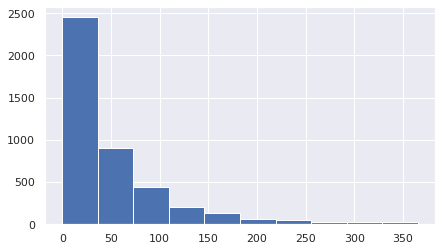

In [106]:
# Histogram of datedifference between single transactions

plt.hist(final_df.DateDiff_mean)
plt.show()

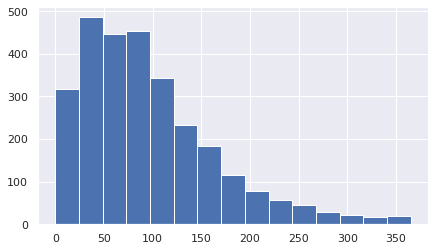

In [105]:
plt.hist(final_df['q90th'].dropna(), bins=15)
plt.show()

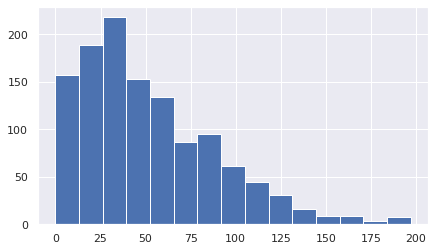

In [54]:
plt.hist(final_df[final_df.churn == 1]['q90th'].dropna(), bins=15)
plt.show()

In [107]:
customer_with_multiple_orders = final_df[final_df.NoTotalTrans > 3]

In [108]:
customer_with_multiple_orders[customer_with_multiple_orders.churn == 1]['q90th'].mean()

48.606415094339624

In [109]:
customer_with_multiple_orders['q90th'].mean()

81.40599201065247

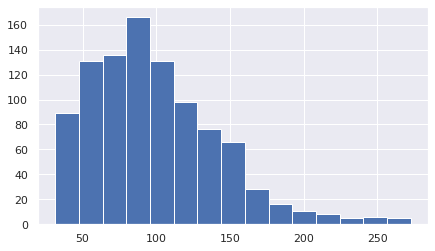

In [110]:
plt.hist(customer_with_multiple_orders[customer_with_multiple_orders.churn != 1]['q90th'].dropna(), bins=15)
plt.show()

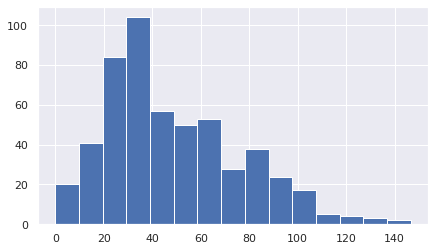

In [111]:
plt.hist(customer_with_multiple_orders[customer_with_multiple_orders.churn == 1]['q90th'].dropna(), bins=15)
plt.show()